# Kruskal-Wallis Test

The Kruskal-Wallis Test is a nonparametric test that assesses whether there are any differences between three or more groups. This notebook follows the example given in the YouTube video by R Statistics and Research on the Kruskall-Wallist test (link: https://www.youtube.com/watch?v=Y1qeAFAV5yQ)

In [7]:
# obtain distance_to_edge file

data <- read.csv(file = "distance_to_edge_20200616.csv")
data

# check that Groups are classified as factors
class(data$Group)

Group,Distance_to_Edge
ChrI-213,0
ChrI-213,0
ChrI-213,0
ChrI-213,43
ChrI-213,47
ChrI-213,48
ChrI-213,51
ChrI-213,55
ChrI-213,56
ChrI-213,65


[1] "factor"

In [8]:
# separate into groups

# ChrI-213 = Group 1
Group1 <- subset(data, Group == "ChrI-213")

# ChrX-227 = Group 2
Group2 <- subset(data, Group == "ChrX-227")

# ChrX-227;male = Group 3
Group3 <- subset(data, Group == "ChrX-227;male")

In [10]:
# test homogeneity of variances using Bartlett test; if p value is greater than 0.05, variances are considered equal

bartlett.test(Distance_to_Edge ~ Group, data = data)


	Bartlett test of homogeneity of variances

data:  Distance_to_Edge by Group
Bartlett's K-squared = 2.4601, df = 2, p-value = 0.2923


In [14]:
# run the Kruskal-Wallis test whether the chromosomes' distances to the nuclear periphery 
# come from the same distribution

kruskal.test(Distance_to_Edge ~ Group, data = data)


	Kruskal-Wallis rank sum test

data:  Distance_to_Edge by Group
Kruskal-Wallis chi-squared = 83.38, df = 2, p-value < 2.2e-16


Data above suggest that at least one of the groups is different

In [15]:
# Run a post-hoc test to determine which group(s) is different - Dunn test for multiple comparisons with Bonferroni
# correction

install.packages("FSA")
library(FSA)

also installing the dependencies ‘zip’, ‘SparseM’, ‘MatrixModels’, ‘sp’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘statmod’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’, ‘car’, ‘dunn.test’, ‘lmtest’, ‘plotrix’, ‘sciplot’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
## FSA v0.8.30. See citation('FSA') if used in publication.
## Run fishR() for related website and fishR('IFAR') for related book.


In [16]:
# run Dunn test

dunnTest(Distance_to_Edge ~ Group, data = data, method="bonferroni")

Dunn (1964) Kruskal-Wallis multiple comparison
  p-values adjusted with the Bonferroni method.



                Comparison         Z      P.unadj        P.adj
1      ChrI-213 - ChrX-227 -6.207699 5.376600e-10 1.612980e-09
2 ChrI-213 - ChrX-227;male -8.902841 5.443526e-19 1.633058e-18
3 ChrX-227 - ChrX-227;male -2.816248 4.858819e-03 1.457646e-02

In [17]:
# visualize the data

install.packages("ggplot2")
library("ggplot2")

also installing the dependencies ‘desc’, ‘pkgbuild’, ‘rprojroot’, ‘pkgload’, ‘praise’, ‘rlang’, ‘testthat’, ‘isoband’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


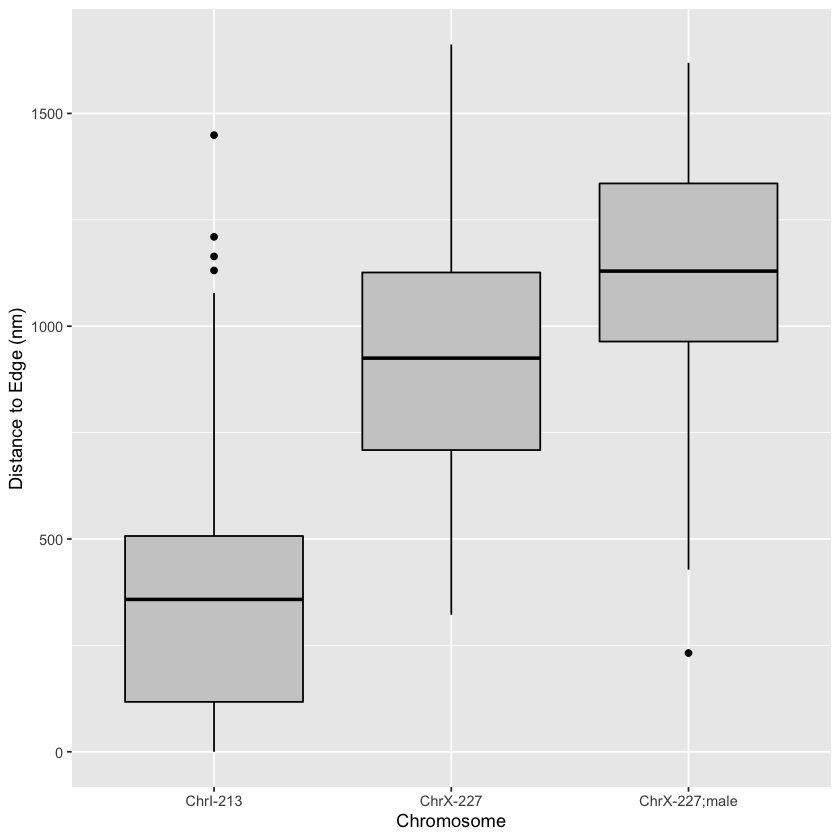

In [19]:
ggplot(data, aes(x = Group, y = Distance_to_Edge)) +
  geom_boxplot(fill = "grey80", colour = "black") +
  scale_x_discrete() + xlab("Chromosome") +
  ylab("Distance to Edge (nm)")